### 사용한 데이터셋

> IMDB Spoiler Dataset: Can you identify which reviews have spoilers to improve user experience?
> - Rishabh Misra, 2019. 05. <br/>
> - doi: 10.13140/RG.2.2.11584.15362 <br/>
> - https://rishabhmisra.github.io/publications
>- https://www.kaggle.com/rmisra/imdb-spoiler-dataset?select=IMDB_reviews.json

### 1) 데이터 정리 및 EDA

#### 1. 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random
import os

np.random.seed(42)
random.seed(42)

In [ ]:
base_path = 'IMDB_Spoiler_Dataset'
details_path = os.path.join(base_path, 'IMDB_movie_details.json')
reviews_path = os.path.join(base_path, 'IMDB_reviews.json')

In [ ]:
details_df = pd.read_json(details_path, lines=True)

print(details_df.shape)
details_df.head(3)

(1572, 7)


,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,


In [ ]:
details_df.tail(3)

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
1569,tt5013056,Evacuation of Allied soldiers from the British...,1h 46min,"[Action, Drama, History]",8.1,2017-07-21,The film alternates between three different pe...
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana B...",1h 33min,"[Comedy, Drama]",5.3,1992-02-21,
1571,tt0114142/,"The marriage of David Burgess, a senior execut...",1h 32min,"[Drama, Thriller]",4.0,1999-01-29,


In [ ]:
reviews_df = pd.read_json(reviews_path, lines=True)

print(reviews_df.shape)
reviews_df.head(3)

(573913, 7)


,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film


In [ ]:
reviews_df.tail(3)

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
573910,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?
573912,3 May 1999,tt0139239,ur0156431,False,Why was this movie made? No doubt to sucker in...,2,Go doesn't go anywhere


#### 2. 데이터 전처리

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# 데이터 타입 및 결측치 확인
print(details_df.info(), end='\n\n')
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating   

In [ ]:
# 데이터 중복 확인
print(details_df.drop(['genre'], axis=1).duplicated().any())
print(reviews_df.duplicated().any())

False
False


In [ ]:
print(details_df[['plot_summary']].duplicated().any())
print(details_df[['plot_synopsis']].duplicated().any())

False
True


In [ ]:
details_df['summary_len'] = details_df['plot_summary'].apply(lambda x: len(x))
details_df['synopsis_len'] = details_df['plot_synopsis'].apply(lambda x: len(x))

In [ ]:
details_df[['summary_len', 'synopsis_len']].describe()

,summary_len,synopsis_len
count,1572.000000,1572.000000
mean,614.258270,8214.993639
std,240.194629,8435.385266
min,95.000000,0.000000
25%,423.750000,2898.750000
50%,578.000000,6192.500000
75%,783.500000,10871.000000
max,1077.000000,63904.000000


synopsis의 평균 글자수는 약 8, 215자나 된다. 이렇게 긴 문서를 처리하려면 시간도 오래 걸리고 메모리도 많이 필요하므로 summary를 사용하기로 한다.

In [ ]:
details_df = details_df.drop(['summary_len', 'synopsis_len', 'plot_synopsis'], axis=1)
details_df.head(1)

,movie_id,plot_summary,duration,genre,rating,release_date
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05


In [ ]:
print(reviews_df[['review_text']].duplicated().any())
print(reviews_df[['review_summary']].duplicated().any())

True
True


In [ ]:
reviews_df[reviews_df[['review_text']].duplicated()].head()
# 똑같은 내용이 여러번 들어가있음 -> 제거

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
256,16 December 2016,tt0111161,ur70282174,True,I have never seen such an amazing film since I...,6,best movie
344,29 February 2016,tt0111161,ur48816155,True,One of my all time favorites. Shawshank Redemp...,10,my vote of 10
360,27 January 2016,tt0111161,ur65159163,True,I have never seen such an amazing film since I...,10,I love it
378,11 December 2015,tt0111161,ur51700029,True,And I truly mean that. When I first saw this f...,10,One of the Greatest Films of All Time.
384,1 November 2015,tt0111161,ur25208400,True,One of my all time favorites. Shawshank Redemp...,10,Real masterpiece


In [ ]:
cond = reviews_df[reviews_df[['review_text']].duplicated()].index
reviews_df = reviews_df.drop(cond)
print(reviews_df.shape)

(573385, 7)


In [ ]:
reviews_df[reviews_df[['review_summary']].duplicated()].head()
# 겹칠 수 있는 내용이고, 필요없는 컬럼이다.

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
164,2 October 2017,tt0111161,ur52180042,True,"Can Hollywood, usually creating things for ent...",9,The Shawshank Redemption
203,14 June 2017,tt0111161,ur77355001,True,This movie is by far one of the best movies I ...,10,Review
208,5 June 2017,tt0111161,ur57560257,True,Best movie It is definitely worthy of its numb...,10,Amazing
209,30 May 2017,tt0111161,ur76836648,True,This was a great movie!!!I enjoyed it. 10/10. ...,10,Best movie
234,21 March 2017,tt0111161,ur74212924,True,"Tim Robbins plays Andy Dufresne, a city banker...",10,Awesome movie


In [ ]:
reviews_df = reviews_df.drop(['review_summary'], axis=1)
reviews_df.head(1)

,review_date,movie_id,user_id,is_spoiler,review_text,rating
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10


##### 내용 외 정보

- details_df

In [ ]:
# duration
details_df['duration'][:10]

0    1h 57min
1    1h 45min
2    1h 37min
3     2h 6min
4    1h 43min
5    2h 18min
6    2h 17min
7    1h 37min
8    2h 22min
9    1h 24min
Name: duration, dtype: object

In [ ]:
# duration 숫자로
def duration_to_int(value):
    if 'h' in value:
        hour = int(value.split('h')[0])
        if len(value.split('h')[1]) > 0:
            minute = int(value.split('h ')[1].split('min')[0])
        else:
            minute = 0
    else:
        hour = 0
        minute = int(value.split('min')[0])
    
    return hour * 60 + minute

In [ ]:
details_df['duration'] = details_df['duration'].apply(duration_to_int)

In [ ]:
details_df['duration'] = details_df['duration'].astype(int)

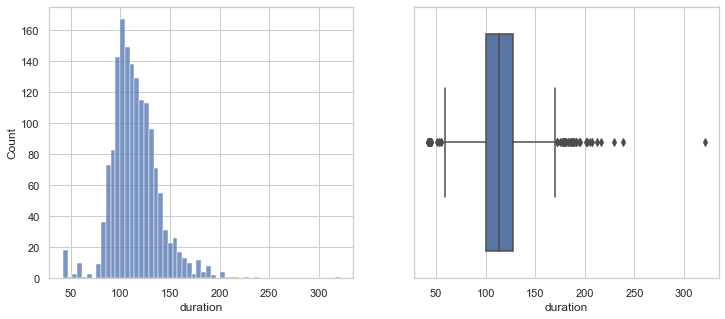

In [ ]:
plt.figure(figsize=(12, 5))
sns.set_theme(style="whitegrid")

plt.subplot(121)
sns.histplot(data=details_df, x='duration')

plt.subplot(122)
sns.boxplot(data=details_df, x='duration');

In [ ]:
# 60분 이하, 180분 이상의 영화는 제거
cond = details_df[(details_df['duration'] <= 60) | (details_df['duration'] >= 180)].index
details_df = details_df.drop(cond)

In [ ]:
# genre
details_df['genre'].value_counts()

[Action, Adventure, Sci-Fi]    68
[Comedy, Drama, Romance]       58
[Comedy]                       49
[Drama]                        48
[Drama, Romance]               48
                               ..
[Drama, History, Music]         1
[Action, Crime, Horror]         1
[Comedy, War]                   1
[Biography, Drama, Family]      1
[Animation, Comedy, Drama]      1
Name: genre, Length: 233, dtype: int64

In [ ]:
# 속하는 장르 개수, 대표 장르(가장 앞에 있는 것) 컬럼 생성
details_df['genre_num'] = details_df['genre'].apply(lambda x: len(x))
details_df['genre_main'] = details_df['genre'].apply(lambda x: x[0])

In [ ]:
details_df.head(3)

,movie_id,plot_summary,duration,genre,rating,release_date,genre_num,genre_main
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",117,"[Action, Thriller]",6.9,1992-06-05,2,Action
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",105,[Comedy],6.6,2013-11-01,1,Comedy
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",97,"[Comedy, Romance]",6.7,2002-04-11,2,Comedy


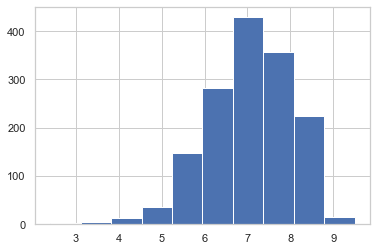

In [ ]:
# rating
details_df['rating'].hist();

In [ ]:
# 4.5점 미만의 영화는 제외
cond = details_df[(details_df['rating'] < 4.5)].index
details_df = details_df.drop(cond)

In [ ]:
# release_date: 연도만 남기기
details_df['release_year'] = details_df['release_date'].apply(lambda x: x[:4])
details_df['release_year'] = details_df['release_year'].astype('int')

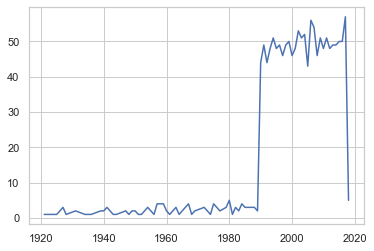

In [ ]:
rs = details_df['release_year'].value_counts().sort_index()
plt.plot(rs.index, rs.values);

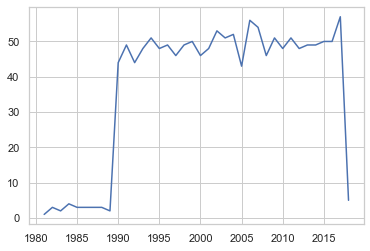

In [ ]:
rs = details_df[details_df['release_year'] > 1980]['release_year'].value_counts().sort_index()
plt.plot(rs.index, rs.values);
# 1990년 이후 영화와 그 전 영화 수의 차이가 큼

In [ ]:
# 1990년 이전 영화는 제외
cond = details_df[(details_df['release_year'] < 1990)].index
details_df = details_df.drop(cond)

- reviews_df

In [ ]:
# movie_id
reviews_df['movie_id'].value_counts(normalize=True)

tt0468569    0.008406
tt0111161    0.007459
tt0167260    0.004752
tt0137523    0.004320
tt0068646    0.003676
               ...   
tt0107719    0.000021
tt6294822    0.000019
tt0104014    0.000009
tt0201265    0.000007
tt0114142    0.000003
Name: movie_id, Length: 1572, dtype: float64

In [ ]:
# user_id
reviews_df['user_id'].value_counts(normalize=True)

ur2898520     0.002272
ur4248714     0.001781
ur0453068     0.001404
ur60028700    0.001343
ur20552756    0.001315
                ...   
ur1585093     0.000002
ur14664385    0.000002
ur3283920     0.000002
ur37077095    0.000002
ur2462204     0.000002
Name: user_id, Length: 263165, dtype: float64

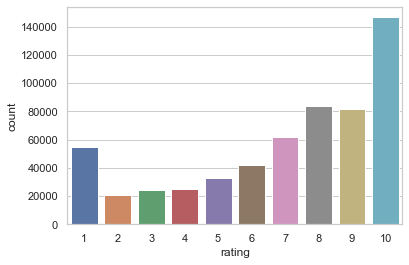

In [ ]:
# rating
sns.countplot(data=reviews_df, x='rating');

In [ ]:
reviews_df['rating'].value_counts(normalize=True).sort_index()

1     0.095466
2     0.036604
3     0.042785
4     0.043520
5     0.056602
6     0.073192
7     0.108180
8     0.146045
9     0.141837
10    0.255769
Name: rating, dtype: float64

In [ ]:
# review_date
reviews_df['review_date']

0         10 February 2006
1         6 September 2000
2            3 August 2001
3         1 September 2002
4              20 May 2004
                ...       
573908       8 August 1999
573909        31 July 1999
573910        20 July 1999
573911        11 June 1999
573912          3 May 1999
Name: review_date, Length: 573385, dtype: object

In [ ]:
# review_date -> 연도만 남기기
reviews_df['review_year'] = reviews_df['review_date'].apply(lambda x: x[-4:])
reviews_df['review_year'] = reviews_df['review_year'].astype('int')

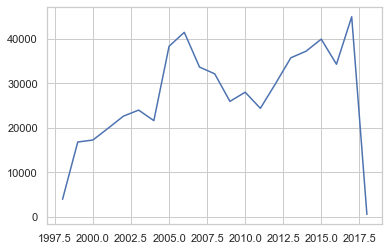

In [ ]:
rs = reviews_df['review_year'].value_counts().sort_index()
plt.plot(rs.index, rs.values);

In [ ]:
details_df['release_date'] = pd.to_datetime(details_df['release_date'], infer_datetime_format=True)

In [ ]:
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'], infer_datetime_format=True)

##### 문장 길이 관련

In [ ]:
print(details_df['plot_summary'].iloc[1][:100])
print(details_df['plot_summary'].iloc[1][-100:])

Billy (Michael Douglas), Paddy (Robert De Niro), Archie (Morgan Freeman) and Sam (Kevin Kline) have 
 rule the Strip, but it's these four who are taking over Vegas.                Written by
Production


문서의 마지막 부분에 'Written by ~'는 필요 없는 정보이므로 제거해야 한다.

In [ ]:
print(reviews_df['review_text'].iloc[0][:100])
print(reviews_df['review_text'].iloc[0][-100:])
print()
print(reviews_df['review_text'].iloc[1][:100])
print(reviews_df['review_text'].iloc[1][-100:])

In its Oscar year, Shawshank Redemption (written and directed by Frank Darabont, after the novella R
r? As Andy says, "It comes down a simple choice, really. Either get busy living, or get busy dying."

The Shawshank Redemption is without a doubt one of the most brilliant movies I have ever seen. Simil
 and one of my Top 3 of all time. This movie is a spectacle to move the mind, soul, and heart. 10/10


In [ ]:
def del_written(value):
    return value.split('        Written by')[0].strip()

In [ ]:
details_df['plot_summary'] = details_df['plot_summary'].apply(del_written)

In [ ]:
print(details_df['plot_summary'].iloc[0][:100])
print(details_df['plot_summary'].iloc[0][-100:])
print()
print(details_df['plot_summary'].iloc[1][:100])
print(details_df['plot_summary'].iloc[1][-100:])

Former CIA analyst, Jack Ryan is in England with his family on vacation when he suddenly witnesses a
s when Jack decides to rejoin the CIA, and they try to find the man before he makes another attempt.

Billy (Michael Douglas), Paddy (Robert De Niro), Archie (Morgan Freeman) and Sam (Kevin Kline) have 
he Sands and Cirque du Soleil may now rule the Strip, but it's these four who are taking over Vegas.


In [ ]:
details_df['plot_summary_len'] = details_df['plot_summary'].apply(lambda x: len(x))
reviews_df['review_text_len'] = reviews_df['review_text'].apply(lambda x: len(x))

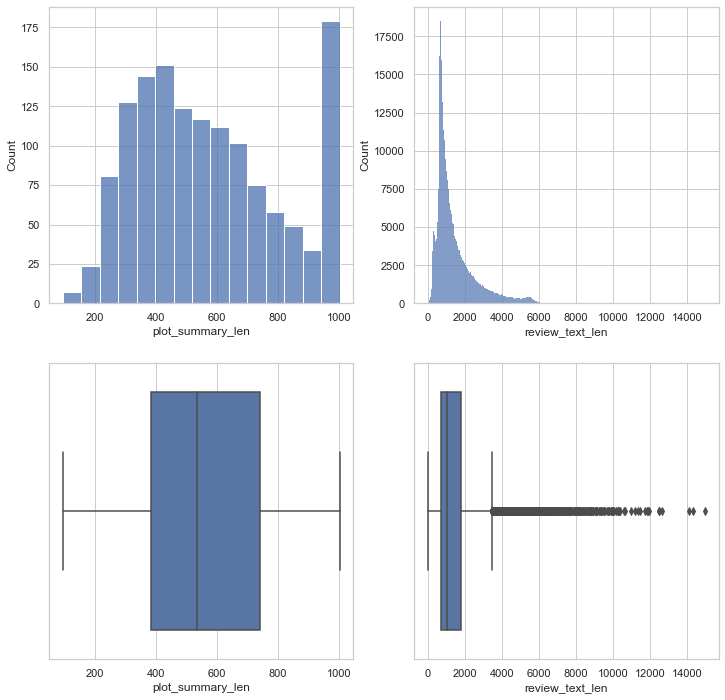

In [ ]:
plt.figure(figsize=(12, 12))
sns.set_theme(style="whitegrid")

plt.subplot(221)
sns.histplot(data=details_df, x='plot_summary_len')

plt.subplot(222)
sns.histplot(data=reviews_df, x='review_text_len')

plt.subplot(223)
sns.boxplot(data=details_df, x='plot_summary_len')

plt.subplot(224)
sns.boxplot(data=reviews_df, x='review_text_len');

In [ ]:
details_df = details_df[details_df['plot_summary_len'] < 1000]
reviews_df = reviews_df[reviews_df['review_text_len'] < 2200]

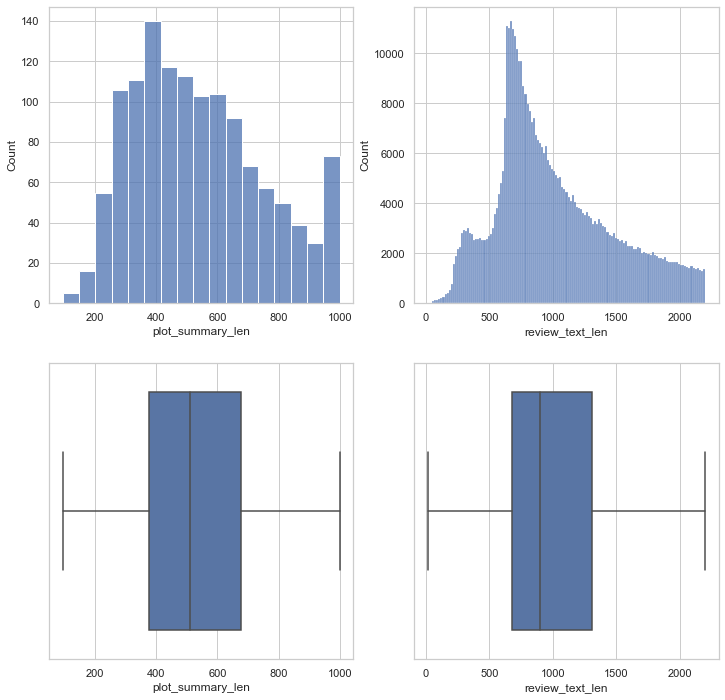

In [ ]:
plt.figure(figsize=(12, 12))
sns.set_theme(style="whitegrid")

plt.subplot(221)
sns.histplot(data=details_df, x='plot_summary_len')

plt.subplot(222)
sns.histplot(data=reviews_df, x='review_text_len')

plt.subplot(223)
sns.boxplot(data=details_df, x='plot_summary_len')

plt.subplot(224)
sns.boxplot(data=reviews_df, x='review_text_len');

In [ ]:
# feature 정리
details_df = details_df.drop(['genre'], axis=1)
details_df.columns = ['movie_id', 'summary', 'duration', 'score_total', 'release_date', 'genre_num', 'genre_main', 'release_year', 'summary_len']

details_df.head(3)

,movie_id,summary,duration,score_total,release_date,genre_num,genre_main,release_year,summary_len
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",117,6.9,1992-06-05,2,Action,1992,990
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",105,6.6,2013-11-01,1,Comedy,2013,620
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",97,6.7,2002-04-11,2,Comedy,2002,626


In [ ]:
reviews_df.columns = ['review_date', 'movie_id', 'user_id', 'is_spoiler', 'review', 'score_by_user', 'review_year', 'review_len']

reviews_df.head(3)

,review_date,movie_id,user_id,is_spoiler,review,score_by_user,review_year,review_len
1,2000-09-06,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,2000,1218
2,2001-08-03,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,2001,1470
6,2005-10-09,tt0111161,ur6574726,True,I have been a fan of this movie for a long tim...,9,2005,900


##### 문자 관련

In [ ]:
import re

In [ ]:
reviews_df['review'].iloc[0]

'The Shawshank Redemption is without a doubt one of the most brilliant movies I have ever seen. Similar to The Green Mile in many respects (and better than it in almost all of them), these two movies have shown us that Stephen King is a master not only of horror but also of prose that shakes the soul and moves the heart. The plot is average, but King did great things with it in his novella that are only furthered by the direction, and the acting is so top-rate it\'s almost scary.Tim Robbins plays Andy Dufrane, wrongly imprisoned for 20 years for the murder of his wife. The story focuses on Andy\'s relationship with "Red" Redding (Morgan Freeman, in probably his best role) and his attempts to escape from Shawshank. Bob Gunton is positively evil and frightening as Warden Norton, and there are great performances and cameos all around; the most prominent one being Gil Bellows (late as Billy of Ally McBeal) as Tommy, a fellow inmate of Andy\'s who suffers under the iron will of Norton.If yo

In [ ]:
# 모두 소문자로
details_df['summary'] = details_df['summary'].apply(lambda x: x.lower())
reviews_df['review'] = reviews_df['review'].apply(lambda x: x.lower())

In [ ]:
# 전처리 함수 생성
# 영어, 숫자 제외 모두 ''으로, i는 I로, 2개 이상의 공백 제거
def pre_processing(value):
    value = re.sub(r"[^a-zA-Z0-9 ']", '', value)
    value = value.replace('i ', 'I ')
    value = value.replace("i'", "I'")
    ' '.join(value.split())
    return value

In [ ]:
details_df['summary'] = details_df['summary'].apply(pre_processing)
reviews_df['review'] = reviews_df['review'].apply(pre_processing)

In [ ]:
reviews_df['review'].iloc[0]

"the shawshank redemption is without a doubt one of the most brilliant movies I have ever seen similar to the green mile in many respects and better than it in almost all of them these two movies have shown us that stephen king is a master not only of horror but also of prose that shakes the soul and moves the heart the plot is average but king did great things with it in his novella that are only furthered by the direction and the acting is so toprate it's almost scarytim robbins plays andy dufrane wrongly imprisoned for 20 years for the murder of his wife the story focuses on andy's relationship with red redding morgan freeman in probably his best role and his attempts to escape from shawshank bob gunton is positively evil and frightening as warden norton and there are great performances and cameos all around the most prominent one being gil bellows late as billy of ally mcbeal as tommy a fellow inmate of andy's who suffers under the iron will of nortonif you haven't seen this movie 

##### 데이터 프레임 merge

In [ ]:
df = pd.merge(details_df, reviews_df, on='movie_id', how='inner')

print(df.shape)
df.head(3)

(382868, 16)


,movie_id,summary,duration,score_total,release_date,genre_num,genre_main,release_year,summary_len,review_date,user_id,is_spoiler,review,score_by_user,review_year,review_len
0,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,1992-06-05,2,Action,1992,990,2008-03-05,ur16517420,True,the second tom clancy novel made into a film '...,6,2008,2004
1,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,1992-06-05,2,Action,1992,990,2007-10-15,ur13887584,True,the second in what looks like becoming the 'ja...,7,2007,665
2,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,1992-06-05,2,Action,1992,990,2013-09-16,ur2403537,True,I was not a fan of the hunt for red october it...,8,2013,1757


In [ ]:
df['review_before_release'] = df.apply(lambda x: 1 if x['review_date'] < x['release_date'] else 0, axis=1)

In [ ]:
df['year_dif'] = df['review_year'] - df['release_year']

In [ ]:
df.head(3)

,movie_id,summary,duration,score_total,release_date,genre_num,genre_main,release_year,summary_len,review_date,user_id,is_spoiler,review,score_by_user,review_year,review_len,review_before_release,year_dif
0,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,1992-06-05,2,Action,1992,990,2008-03-05,ur16517420,True,the second tom clancy novel made into a film '...,6,2008,2004,0,16
1,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,1992-06-05,2,Action,1992,990,2007-10-15,ur13887584,True,the second in what looks like becoming the 'ja...,7,2007,665,0,15
2,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,1992-06-05,2,Action,1992,990,2013-09-16,ur2403537,True,I was not a fan of the hunt for red october it...,8,2013,1757,0,21


In [ ]:
df = df.drop(['release_date', 'review_date'], axis=1)

In [ ]:
df.head(3)

,movie_id,summary,duration,score_total,genre_num,genre_main,release_year,summary_len,user_id,is_spoiler,review,score_by_user,review_year,review_len,review_before_release,year_dif
0,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,2,Action,1992,990,ur16517420,True,the second tom clancy novel made into a film '...,6,2008,2004,0,16
1,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,2,Action,1992,990,ur13887584,True,the second in what looks like becoming the 'ja...,7,2007,665,0,15
2,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,2,Action,1992,990,ur2403537,True,I was not a fan of the hunt for red october it...,8,2013,1757,0,21


### 2) 타겟 분포 확인

In [ ]:
# 타겟 비율 확인
df['is_spoiler'].value_counts(normalize=True)

False    0.769317
True     0.230683
Name: is_spoiler, dtype: float64

스포를 한 댓글의 비율이 훨씬 적다.

In [ ]:
df['is_spoiler'] = df['is_spoiler'].apply(lambda x: 1 if x == True else 0)
df['is_spoiler'].value_counts(normalize=True)

0    0.769317
1    0.230683
Name: is_spoiler, dtype: float64

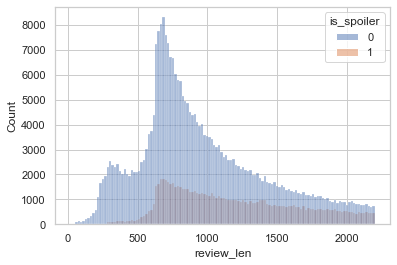

In [ ]:
# 타겟별 문장 길이 분포
sns.histplot(data=df, x='review_len', hue='is_spoiler');

스포일러 리뷰와 그렇지 않은 리뷰의 문장 길이 분포는 별 차이가 없다. (문장 길이만으로는 스포일러와 스포일러가 아닌 리뷰를 구별할 수 없다.)

### 3) 토큰화

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer

In [ ]:
nlp = spacy.load('en_core_web_lg')
tokenizer = Tokenizer(nlp.vocab)
# lemmatization을 사용하고 싶었는데 시간이 너무 오래 걸림

In [ ]:
print('tokenize review...')
df['review_tokens'] = df['review'].apply(lambda x: [ token.text for token in tokenizer(x)])

tokenize review...


In [ ]:
print('tokenize summary...')
df['summary_tokens'] = df['summary'].apply(lambda x: [ token.text for token in tokenizer(x)])

tokenize summary...


In [ ]:
df.head(2)

,movie_id,summary,duration,score_total,genre_num,genre_main,release_year,summary_len,user_id,is_spoiler,review,score_by_user,review_year,review_len,review_before_release,year_dif,review_tokens,summary_tokens
0,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,2,Action,1992,990,ur16517420,1,the second tom clancy novel made into a film '...,6,2008,2004,0,16,"[the, second, tom, clancy, novel, made, into, ...","[former, cia, analyst, jack, ryan, is, in, eng..."
1,tt0105112,former cia analyst jack ryan is in england wit...,117,6.9,2,Action,1992,990,ur13887584,1,the second in what looks like becoming the 'ja...,7,2007,665,0,15,"[the, second, in, what, looks, like, becoming,...","[former, cia, analyst, jack, ryan, is, in, eng..."


In [ ]:
from gensim.models import KeyedVectors

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gayeon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
# 단어 목록 생성
voc_dict = dict()
inverse_vocabulary = ['<nan>']
stops = set(stopwords.words('english'))

In [ ]:
for index, row in df.iterrows():
    for col in ['summary_tokens', 'review_tokens']:
        text_to_list = []
        
        for word in row[col]:
            
            # 이번 단어가 불용어이면 그냥 지나감
            if (word in stops) and (word not in word2vec.vocab):
                continue
            
            # 단어가 voc_dict에 없을 경우 추가
            if word not in voc_dict:
                voc_dict[word] = len(inverse_vocabulary)
                text_to_list.append(len(inverse_vocabulary))
                inverse_vocabulary.append(word)
            else:
                text_to_list.append(voc_dict[word])
         
        # 토큰 리스트를 숫자 리스트로 교체
        df.at[index, col] = text_to_list

In [ ]:
# embedding matrix 생성
np.random.seed(42)
embedding_dim = 300

embeddings = 1 * np.random.randn(len(voc_dict) + 1, embedding_dim)
embeddings[0] = 0

for word, index in voc_dict.items():
    
    # word2vec.vocab에 있는 단어이면 해당 단어의 벡터로 교체, 아니면 랜덤값 유지
    if word in word2vec.vocab:
        embeddings[index] = word2vec.word_vec(word)

### 4) 데이터 정리 및 저장

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train, validation, test dataset 나누기
target = 'is_spoiler'

train, test = train_test_split(df,
                               test_size=0.2,
                               random_state=42,
                               stratify=df[target])

train, val = train_test_split(train,
                              test_size=0.25,
                              random_state=42,
                              stratify=train[target])


print(train.shape, val.shape, test.shape)

(229720, 18) (76574, 18) (76574, 18)


In [ ]:
import pickle
import gzip

In [ ]:
# 저장 함수 생성
def save_as_pickle(data, file_name):
    base_path = 'IMDB_Spoiler_Dataset'
    file_path = os.path.join(base_path, file_name)
    
    with gzip.open(file_path, 'wb') as f:
        pickle.dump(data, f)

In [ ]:
train.head(1)

,movie_id,summary,duration,score_total,genre_num,genre_main,release_year,summary_len,user_id,is_spoiler,review,score_by_user,review_year,review_len,review_before_release,year_dif,review_tokens,summary_tokens
71233,tt0384537,sharon da silva wakes up every night screaming...,125,6.6,3,Adventure,2006,358,ur1688679,0,every once in a while the telltaleterror cross...,9,2007,1235,0,1,"[382, 582, 7, 1285, 32, 211089, 52566, 1384, 9...","[14322, 20766, 190187, 30621, 189, 382, 1142, ..."


In [ ]:
# synopsis, review 내용은 없는 dataset (feature + target)
col = ['duration', 'score_total', 'genre_num', 'genre_main',
       'release_year', 'summary_len', 'score_by_user', 'review_year',
       'review_len', 'review_before_release', 'year_dif', 'is_spoiler']

print('save train...')
save_as_pickle(train[col], 'train.pickle')
print('save val...')
save_as_pickle(val[col], 'val.pickle')
print('save test...')
save_as_pickle(test[col], 'test.pickle')

print('save embeddings...')
save_as_pickle(embeddings, 'embeddings.pickle')
print('save voc_dict...')
save_as_pickle(voc_dict, 'voc_dict.pickle')

save train...
save val...
save test...
save embeddings...
save voc_dict...


In [ ]:
import itertools
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# 토큰 dataset zero padding 후 따로 저장 (feature / target)
target = 'is_spoiler'

X_train = {'summary': train['summary_tokens'],
           'review':train['review_tokens']}

X_val = {'summary': val['summary_tokens'],
         'review':val['review_tokens']}

X_test = {'summary': test['summary_tokens'],
          'review':test['review_tokens']}

y_train = train[target].values
y_val = val[target].values
y_test = test[target].values

In [ ]:
# zero padding
max_len = max(
    train['summary_tokens'].map(lambda x: len(x)).max(),
    train['review_tokens'].map(lambda x: len(x)).max(),
    val['summary_tokens'].map(lambda x: len(x)).max(),
    val['review_tokens'].map(lambda x: len(x)).max(),
    test['summary_tokens'].map(lambda x: len(x)).max(),
    test['review_tokens'].map(lambda x: len(x)).max())

print(max_len)
print('zero paddings...')

for dataset, side in itertools.product([X_train, X_val, X_test], ['summary', 'review']):
    dataset[side] = pad_sequences(dataset[side], maxlen=max_len)

514
zero paddings...


In [ ]:
print('save X_train_word...')
save_as_pickle(X_train, 'X_train_word.pickle')
print('save X_val_word...')
save_as_pickle(X_val, 'X_val_word.pickle')
print('save X_test_word...')
save_as_pickle(X_test, 'X_test_word.pickle')

print('save y_train...')
save_as_pickle(y_train, 'y_train.pickle')
print('save y_val...')
save_as_pickle(y_val, 'y_val.pickle')
print('save y_test...')
save_as_pickle(y_test, 'y_test.pickle')

print('save max_len...')
save_as_pickle(max_len, 'max_len.pickle')

save X_train_word...
save X_val_word...
save X_test_word...
save y_train...
save y_val...
save y_test...
save max_len...


In [ ]:
# bert를 위해서 문장 그대로의 데이터셋도 저장
col = ['summary', 'review', 'is_spoiler']

print('save train_sentences...')
save_as_pickle(train[col], 'train_sentences.pickle')
print('save val_sentences...')
save_as_pickle(val[col], 'val_sentences.pickle')
print('save test_sentences...')
save_as_pickle(test[col], 'test_sentences.pickle')

save train_sentences...
save val_sentences...
save test_sentences...
